In [62]:
%pip install --upgrade nbformat



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# lecture du dataset 
df = pd.read_csv('Evolution_DataSets.csv')
df.head()

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,Australopithecus Anamensis,4.595606,Africa,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
4,Australopithecus Africanus,3.614060,Africa,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light


Affichage des cinq premières lignes du dataset avec la commande df.head(), pour vérifier que le fichier a bien été chargé et obtenir un aperçu des différentes variables.

## Data Cleaning

In [66]:
#affiche des differentes statistiques
df.describe(include='all')

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
count,12000,12000.000000,12000,12000,12000,12000,12000.000000,12000.000000,12000,12000,...,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000
unique,24,NaN,3,4,8,8,NaN,NaN,5,4,...,4,3,2,5,3,4,3,4,2,3
top,hominino Orrorin tugenencin,NaN,Africa,oriental,Kenya,savannah,NaN,NaN,small,U shape,...,modern,climbing,walk,omnivore,high,wide,no,old,no,light
freq,500,NaN,9000,6500,3500,4000,NaN,NaN,5000,6000,...,5500,7500,7500,4500,6000,5000,7000,5500,9000,5500
mean,NaN,2.532665,NaN,NaN,NaN,NaN,616.824303,131.452198,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.776998,NaN,NaN,NaN,NaN,356.275762,24.539191,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000529,NaN,NaN,NaN,NaN,0.074910,80.009030,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.050566,NaN,NaN,NaN,NaN,334.430993,112.986802,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.317031,NaN,NaN,NaN,NaN,511.320200,125.508305,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.656959,NaN,NaN,NaN,NaN,919.807697,153.877355,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Grâce à la commande df.describe(include='all'), on obtient un aperçu des statistiques de base :

La colonne Genus & Specie comprend 12 000 enregistrements répartis en 24 espèces distinctes.

Pour chaque variable numérique, on dispose de la moyenne, de l’écart-type, du minimum, du maximum et des quartiles etc...

L’individu le plus ancien date d’environ 7 millions d’années.

La capacité crânienne minimale observée est de 0,074 cm³.

La taille médiane (50ᵉ percentile) est de 125,51 cm.

Ces statistiques élémentaires permettent de comprendre rapidement et efficacement la distribution et la portée des données dont nous disposons.

In [67]:
# renseignement sur le type de données et les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genus_&_Specie           12000 non-null  object 
 1   Time                     12000 non-null  float64
 2   Location                 12000 non-null  object 
 3   Zone                     12000 non-null  object 
 4   Current_Country          12000 non-null  object 
 5   Habitat                  12000 non-null  object 
 6   Cranial_Capacity         12000 non-null  float64
 7   Height                   12000 non-null  float64
 8   Incisor_Size             12000 non-null  object 
 9   Jaw_Shape                12000 non-null  object 
 10  Torus_Supraorbital       12000 non-null  object 
 11  Prognathism              12000 non-null  object 
 12  Foramen_Mágnum_Position  12000 non-null  object 
 13  Canine Size              12000 non-null  object 
 14  Canines_Shape         

> **Informations générales sur le dataset :**  
> - **Nombre de lignes :** 12 000  
> - **Nombre de colonnes :** 28  
> - **Types de données :**  
>   - **float64 (3 colonnes)** : `Time`, `Cranial_Capacity`, `Height`  
>   - **object (25 colonnes)** : variables catégorielles telles que `Genus & Specie`, `Location`, `Zone`, `Current_Country`, `Habitat`, `Incisor_Size`, `Jaw_Shape`, `biped`, `Arms`, `Foots`, `Diet`, `Sexual_Dimorphism`, `Hip`, `Vertical_Front_Anatomy`, `Migrated`, `Skeleton`, etc.  

Cette répartition — 3 variables numériques continues et 25 variables qualitatives — nous permet à la fois d’étudier les tendances chiffrées (âge, capacité crânienne, taille) et la diversité des caractéristiques qualitatives (espèces, habitats, comportements supposés…) pour mieux comprendre le contenu et la structure de notre jeu de données.

In [68]:
# affiche les noms des colonnes
df.columns

Index(['Genus_&_Specie', 'Time', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape',
       'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position',
       'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type',
       'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip',
       'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton'],
      dtype='object')

Prise de connaissance des différentes colonnes

In [69]:
df.isna().sum()
# Visualisation de la distribution des valeurs manquantes

Genus_&_Specie             0
Time                       0
Location                   0
Zone                       0
Current_Country            0
Habitat                    0
Cranial_Capacity           0
Height                     0
Incisor_Size               0
Jaw_Shape                  0
Torus_Supraorbital         0
Prognathism                0
Foramen_Mágnum_Position    0
Canine Size                0
Canines_Shape              0
Tooth_Enamel               0
Tecno                      0
Tecno_type                 0
biped                      0
Arms                       0
Foots                      0
Diet                       0
Sexual_Dimorphism          0
Hip                        0
Vertical_Front             0
Anatomy                    0
Migrated                   0
Skeleton                   0
dtype: int64

Aucune valeur manquante n’a été détectée dans ce jeu de données.

In [70]:

# Conversion des colonnes de type object en type category
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype("category")
df.info()
# Affichage des valeurs uniques pour chaque colonne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Genus_&_Specie           12000 non-null  category
 1   Time                     12000 non-null  float64 
 2   Location                 12000 non-null  category
 3   Zone                     12000 non-null  category
 4   Current_Country          12000 non-null  category
 5   Habitat                  12000 non-null  category
 6   Cranial_Capacity         12000 non-null  float64 
 7   Height                   12000 non-null  float64 
 8   Incisor_Size             12000 non-null  category
 9   Jaw_Shape                12000 non-null  category
 10  Torus_Supraorbital       12000 non-null  category
 11  Prognathism              12000 non-null  category
 12  Foramen_Mágnum_Position  12000 non-null  category
 13  Canine Size              12000 non-null  category
 14  Canine

In [71]:
# Normalisation des variables.
df["Cranial_Capacity_normalized"] = df["Cranial_Capacity"] / df["Cranial_Capacity"].max()
df["Height_normalized"] = df["Height"] / df["Height"].max()

Application d’une normalisation des variables numériques Cranial_Capacity et Height pour les ramener à une même échelle et faciliter ainsi les calculs.

In [72]:
# Renommer les colonnes pour inclure les unités
df.rename(columns={
    "Cranial_Capacity": "Cranial_Capacity_(cm³)",
    "Height": "Height_(cm)"
}, inplace=True)
# Vérification
df.head(1)

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity_(cm³),Height_(cm),Incisor_Size,Jaw_Shape,...,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton,Cranial_Capacity_normalized,Height_normalized
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.5141,110.24323,small,conical,...,climbing,dry fruits,high,wide,no,old,no,light,0.099775,0.595969


Renommage des variables numériques pour préciser les unités : Cranial_Capacity (cm³) et Height (cm), afin d’améliorer la lisibilité et la compréhension.

In [73]:
df.duplicated().sum()

np.int64(0)

Aucune ligne en double n’a été détectée dans ce jeu de données.

In [74]:
# Sélectionner toutes les colonnes numériques du DataFrame
colonnes_numeriques = df.select_dtypes(include=["number"]).columns

# Parcourir chaque colonne numérique pour détecter les valeurs aberrantes
for col in colonnes_numeriques:
    Q1 = df[col].quantile(0.25) # Premier quartile
    Q3 = df[col].quantile(0.75) # Troisième quartile
    IQR = Q3 - Q1 # Intervalle interquartile
    borne_inf = Q1 - 1.5 * IQR # Limite inférieure
    borne_sup = Q3 + 1.5 * IQR # Limite supérieure

    # Utiliser une compréhension de liste pour récupérer les valeurs aberrantes
    valeurs_aberrantes = df[(df[col] < borne_inf) | (df[col] > borne_sup)][col]
    
    print(f"Nombre de valeurs aberrantes pour la colonne {col} : {valeurs_aberrantes.shape[0]}")



Nombre de valeurs aberrantes pour la colonne Time : 56
Nombre de valeurs aberrantes pour la colonne Cranial_Capacity_(cm³) : 0
Nombre de valeurs aberrantes pour la colonne Height_(cm) : 0
Nombre de valeurs aberrantes pour la colonne Cranial_Capacity_normalized : 0
Nombre de valeurs aberrantes pour la colonne Height_normalized : 0


Aucune valeur aberrante n’a été détectée, à l’exception de la colonne « Time » qui présente une valeur de 56. J’ai toutefois décidé de la conserver, car Les valeurs de la colonne Time vont de 0,000529 Ma (soit ~529 ans) à 7,699 Ma (soit ~7 699 000 ans), avec une distribution suivante :

1er quartile (25 %) : 1,051 Ma

médiane (50 %) : 2,317 Ma

3e quartile (75 %) : 3,657 Ma

Ces bornes correspondent bien à la fenêtre temporelle dans laquelle on attend les fossiles d’homininés (les plus anciens connus autour de 7 Ma, les plus récents datés de quelques centaines d’années). Il n’y a donc pas d’anomalie majeure dans cette variable : tous les âges sont plausibles vis-à-vis de la chronologie paléoanthropologique.

In [75]:
# nouvelle colonne pour le temps en années
df['Time_years'] = df['Time'] * 1_000_000
# nenommer la colonne Time pour inclure les unités
df.rename(columns={'Time': 'Time_(Ma)'}, inplace=True)

Création d’une nouvelle colonne Time_years (temps en années) et renommage de la colonne Time en Time (Ma) pour préciser l’unité.

/var/folders/dl/grllz11s10j3k3rm1rt8w0nw0000gn/T/ipykernel_13504/3556317976.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




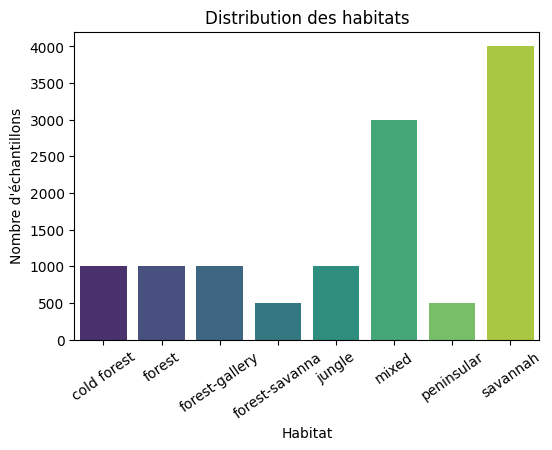

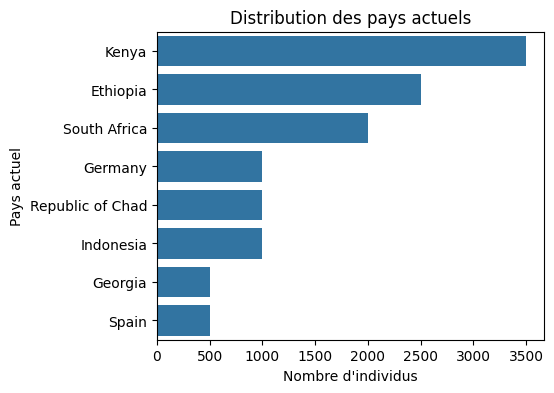

/var/folders/dl/grllz11s10j3k3rm1rt8w0nw0000gn/T/ipykernel_13504/3556317976.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




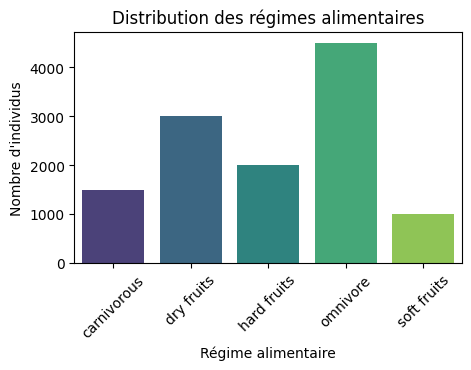

In [76]:
df["Habitat"].value_counts()
# Visualisation de l'habitat
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Habitat", palette="viridis")
plt.title("Distribution des habitats")
plt.xlabel("Habitat")
plt.ylabel("Nombre d'échantillons")
plt.xticks(rotation=35)
plt.show()

df["Current_Country"].value_counts()
# Visualisation de la distribution des pays
plt.figure(figsize=(5, 4))
sns.countplot(data=df, y="Current_Country", order=df["Current_Country"].value_counts().index)
plt.title("Distribution des pays actuels")
plt.xlabel("Nombre d'individus")
plt.ylabel("Pays actuel")
plt.show()

df["Diet"].value_counts()
# Visualisation de la distribution des régimes alimentaires
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x="Diet", palette="viridis")
plt.title("Distribution des régimes alimentaires")
plt.xlabel("Régime alimentaire")
plt.ylabel("Nombre d'individus")
plt.xticks(rotation=45)
plt.show()

Ces trois graphiques apportent des informations clés sur notre jeu de données :

Répartition des habitats
Le premier montre que la grande majorité des individus vivaient en savane, avec près de 4 000 spécimens découverts dans ce type d’habitat.

Répartition géographique
Le deuxième illustre que le Kenya (en Afrique) est de loin la région la plus représentée, avec environ 3 500 fossiles trouvés sur son territoire.

Régimes alimentaires
Le troisième révèle que la plupart des espèces étaient omnivores, soit un peu plus de 4 000 individus.

Ces visualisations mettent en évidence les habitats, les pays et les modes d’alimentation dominants dans notre échantillon.

In [77]:
df["Migrated"].value_counts()

Migrated
no     9000
yes    3000
Name: count, dtype: int64

In [78]:

import time
from geopy.geocoders import Nominatim   # ← Add this line

# 1. Préparer la colonne à géocoder (seulement le pays)
df["full_address"] = df["Current_Country"].astype(str)

# 2. Initialiser le géocodeur
geolocator = Nominatim(user_agent="geo_app")

# 3. Fonction « safe » pour récupérer lat/lon
def geocode_safe(country):
    try:
        loc = geolocator.geocode(country, timeout=10)
        time.sleep(1)  # pause pour respecter le quota
        if loc:
            return pd.Series({"Latitude": loc.latitude, "Longitude": loc.longitude})
    except Exception:
        pass
    return pd.Series({"Latitude": None, "Longitude": None})

# 4. Géocoder chaque pays unique
unique_countries = df["full_address"].unique()
geo_df = pd.DataFrame(unique_countries, columns=["full_address"])
geo_df[["Latitude", "Longitude"]] = geo_df["full_address"].apply(geocode_safe)

# 5. Fusionner les coordonnées dans le dataframe
df = df.merge(geo_df, on="full_address", how="left")

# 6. Résultat
print(df[["Current_Country", "Latitude", "Longitude"]].drop_duplicates().head())



    Current_Country   Latitude  Longitude
0             Kenya   1.441968  38.431398
1          Ethiopia  10.211670  38.652120
4      South Africa -28.816624  24.991639
7  Republic of Chad  15.613414  19.015617
8           Germany  51.163818  10.447831


Ajout des variables géographiques « longitude » et « latitude » afin de faciliter la visualisation des données.

# Visualisation

In [79]:
!pip install cluster
!pip install preprocessing


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [80]:
import plotly as py
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import time
import pygwalker as pyg
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [81]:
df.dtypes


Genus_&_Specie                 category
Time_(Ma)                       float64
Location                       category
Zone                           category
Current_Country                category
Habitat                        category
Cranial_Capacity_(cm³)          float64
Height_(cm)                     float64
Incisor_Size                   category
Jaw_Shape                      category
Torus_Supraorbital             category
Prognathism                    category
Foramen_Mágnum_Position        category
Canine Size                    category
Canines_Shape                  category
Tooth_Enamel                   category
Tecno                          category
Tecno_type                     category
biped                          category
Arms                           category
Foots                          category
Diet                           category
Sexual_Dimorphism              category
Hip                            category
Vertical_Front                 category


In [ ]:
# Affichage des statistiques descriptives pour la colonne "Cranial_Capacity_(cm³)"
df["Cranial_Capacity_(cm³)"].describe()

count    12000.000000
mean       616.824303
std        356.275762
min          0.074910
25%        334.430993
50%        511.320200
75%        919.807697
max       1448.397470
Name: Cranial_Capacity_(cm³), dtype: float64

L'affichage des statistiques descriptives de la capacité crânienne des individus permet d'obtenir rapidement des informations clés, comme la capacité minimale (min = 0,074910) et maximale (max = 1448,397470). On peut également connaître la moyenne de la capacité cérébrale ainsi que les différentes valeurs seuils correspondant aux quartiles.

In [100]:
df.to_csv(
    "Evolution_DataSets_clean.csv",
    index=False,
)

In [84]:
feature_categorical = [cname for cname in df.columns if df[cname].dtype == "object"]
df[feature_categorical] = df[feature_categorical].astype("str")

feature_numeric = [cname for cname in df.columns if df[cname].dtype == "float" or df[cname].dtype=="int"]
print(feature_numeric)
print(feature_categorical)

['Time_(Ma)', 'Cranial_Capacity_(cm³)', 'Height_(cm)', 'Cranial_Capacity_normalized', 'Height_normalized', 'Time_years', 'Latitude', 'Longitude']
['full_address']


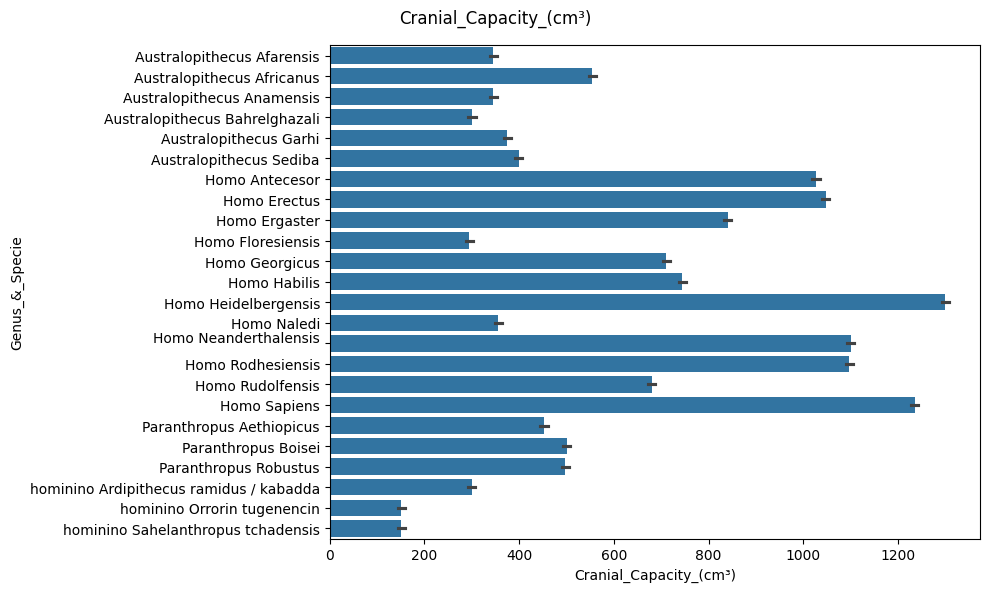

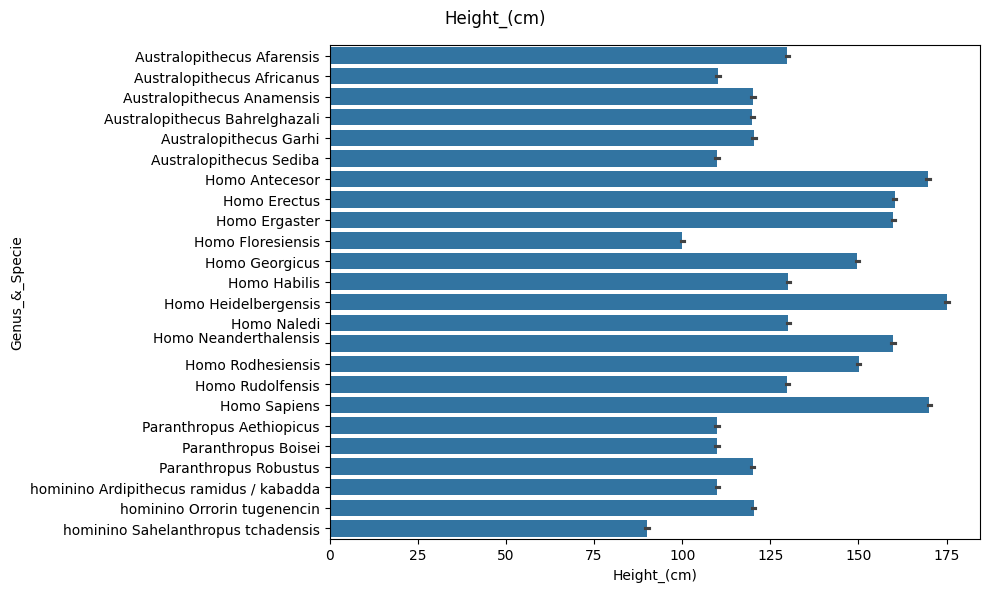

In [85]:
# Ne garder que les deux variables qui t’intéressent
features_to_plot = ["Cranial_Capacity_(cm³)", "Height_(cm)"]

for column in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df,
        x=column,
        y="Genus_&_Specie"
    )
      
    plt.suptitle(f'{column}', color='black')
    plt.xlabel(column)
    plt.ylabel("Genus_&_Specie")
    plt.tight_layout()
    plt.show()

Ces deux graphiques nous permettent d’obtenir des informations sur les différents individus présents dans le dataset. Le premier graphique met en évidence ceux ayant la plus grande capacité crânienne, comme Homo sapiens et Homo heidelbergensis, dont la capacité dépasse les 1200 cm³. Le second graphique montre que ces mêmes individus figurent également parmi les plus grands en taille, atteignant environ 1m75. Ces observations suggèrent qu’il pourrait exister une certaine corrélation entre la taille corporelle et le volume de la boîte crânienne.

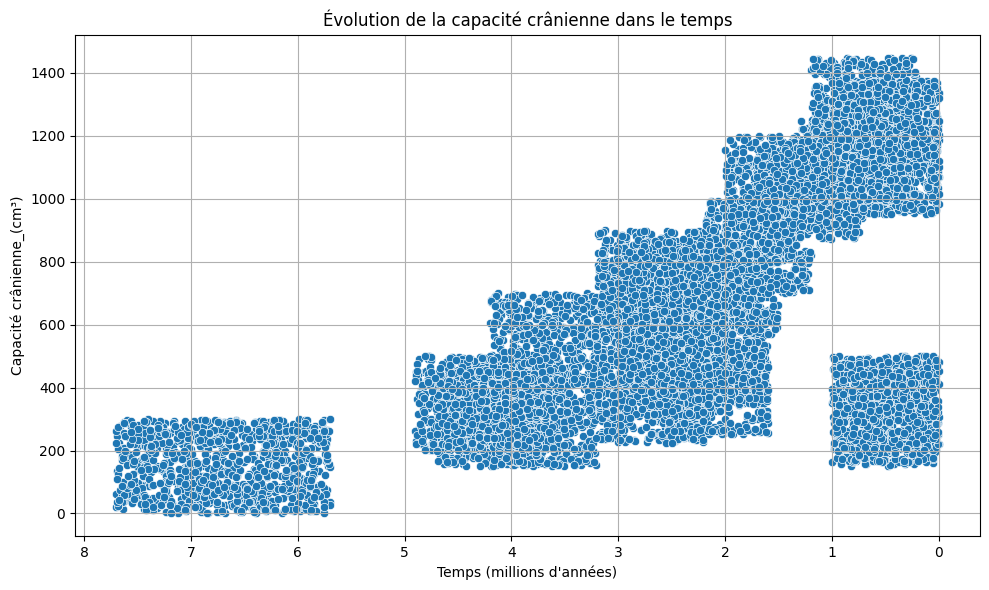

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Time_(Ma)", y="Cranial_Capacity_(cm³)")
plt.title("Évolution de la capacité crânienne dans le temps")
plt.xlabel("Temps (millions d'années)")
plt.ylabel("Capacité crânienne_(cm³)")
plt.gca().invert_xaxis()  # inverser l'axe du temps pour aller du passé vers le présent
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisation de la capacité crânienne en fonction du temps


Ce graphique montre une augmentation nette de la capacité crânienne des individus au fil du temps, traduisant une évolution significative du volume cérébral chez les hominines.

Entre 7,5 et 5,8 millions d’années, la capacité crânienne reste très faible, généralement comprise entre 100 et 300 cm³, ce qui correspond aux premiers hominines, proches des grands singes.

De 5 à 1 million d’années, on observe une progression presque linéaire : la capacité crânienne passe d’environ 200 cm³ à 1200 cm³, soit un gain de 1000 cm³ sur environ 4 millions d’années. Cette phase correspond probablement à l’apparition et à l’évolution d’espèces comme Homo habilis et Homo erectus.

Entre 1 million d’années et environ 500 ans, la capacité crânienne continue d’augmenter pour atteindre jusqu’à 1500 cm³, ce qui se rapproche des valeurs observées chez l’Homme moderne.

On note également qu’à ces époques plus récentes, certains individus présentent encore des capacités crâniennes comprises entre 150 et 500 cm³. Cela pourrait correspondre à des espèces archaïques tardives ou isolées (ex. Homo floresiensis), ou à des artefacts de mesure ou de datation.

À titre de référence, la capacité crânienne moyenne chez l’Homme moderne est d’environ 1350 cm³.




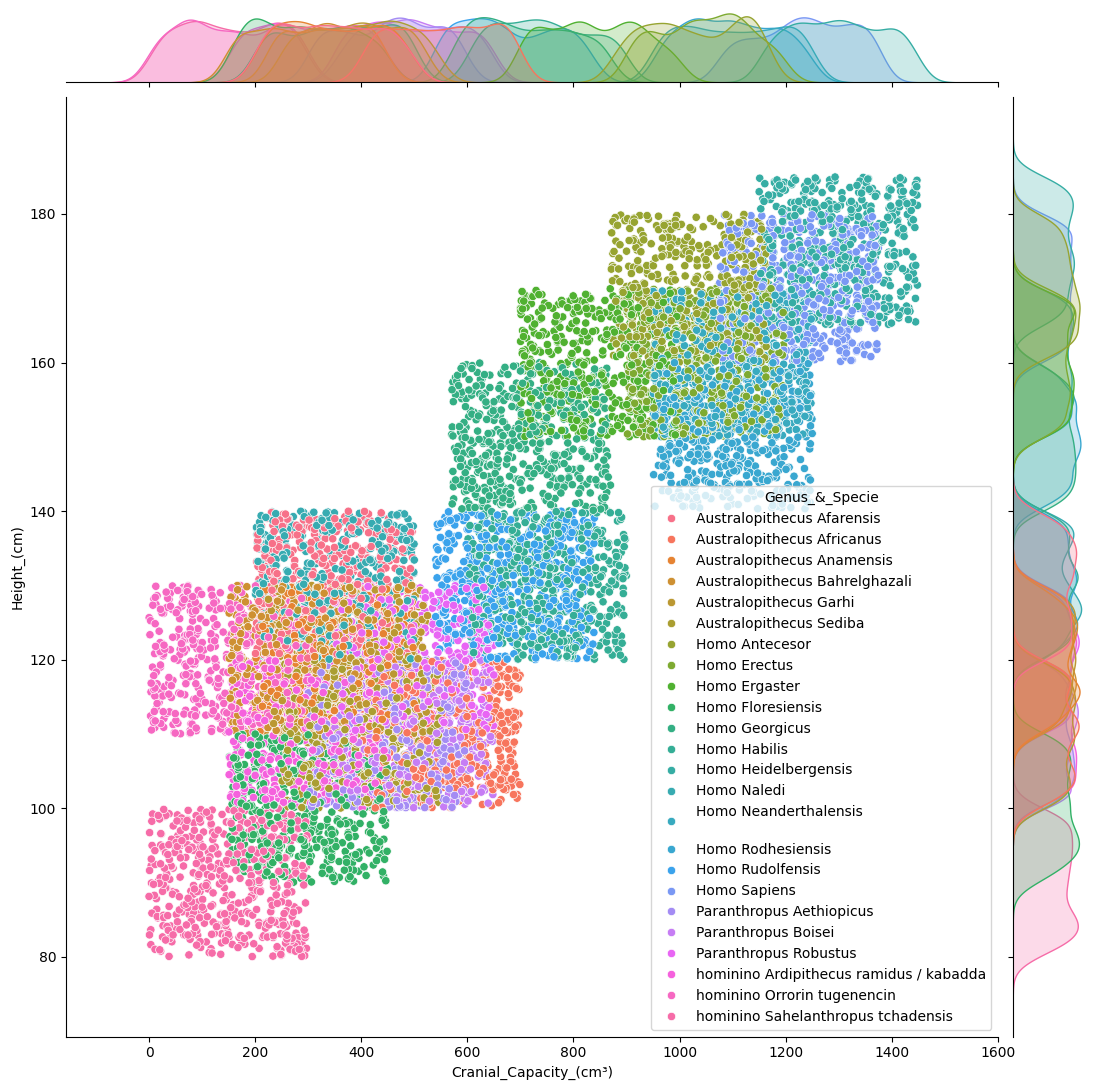

In [87]:
sns.jointplot(data=df, x="Cranial_Capacity_(cm³)", y="Height_(cm)", hue="Genus_&_Specie", height=11, ratio=11)

Ce graphique illustre la relation entre la capacité crânienne (en cm³) et la taille corporelle (en cm) des différentes espèces du dataset, avec une représentation en nuage de points colorés selon le genre et l'espèce. Les distributions marginales en haut et à droite offrent une vue d'ensemble des densités pour chaque variable.

On constate que les espèces comme Homo sapiens, Homo heidelbergensis et Homo neanderthalensis occupent la partie supérieure droite du graphique, indiquant à la fois une grande taille corporelle (jusqu’à 185 cm) et une capacité crânienne importante (jusqu’à 1450 cm³). À l’opposé, des espèces plus anciennes telles que Sahelanthropus tchadensis, Orrorin tugenensis ou encore les Australopithèques présentent des valeurs nettement inférieures pour ces deux variables.

Ce schéma suggère une corrélation évolutive positive entre la taille et la capacité crânienne, renforçant l’hypothèse d’une évolution conjointe de ces traits au sein de la lignée humaine.

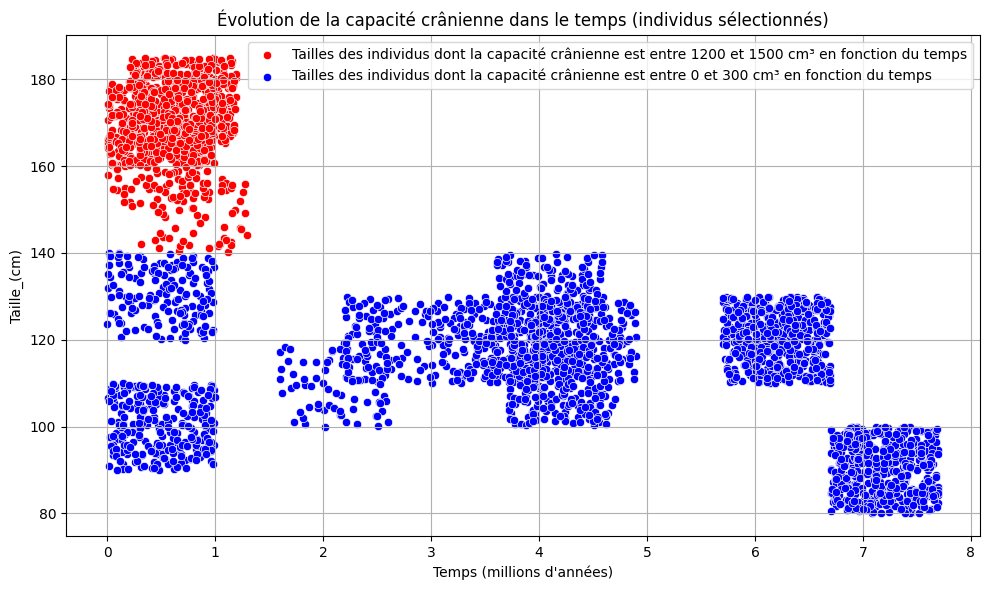

In [88]:
# Sélection des individus à forte capacité crânienne


c_sup = (df["Cranial_Capacity_(cm³)"] >= 1200) & (df["Cranial_Capacity_(cm³)"] <= 1500)
c_inf = (df["Cranial_Capacity_(cm³)"] >= 0) & (df["Cranial_Capacity_(cm³)"] <= 300)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[c_sup], x="Time_(Ma)", y="Height_(cm)", color='red', label='Tailles des individus dont la capacité crânienne est entre 1200 et 1500 cm³ en fonction du temps')
sns.scatterplot(data=df[c_inf], x="Time_(Ma)", y="Height_(cm)", color='blue', label='Tailles des individus dont la capacité crânienne est entre 0 et 300 cm³ en fonction du temps')
plt.title("Évolution de la capacité crânienne dans le temps (individus sélectionnés)")
plt.xlabel("Temps (millions d'années)")
plt.ylabel("Taille_(cm)") 
plt.gca().invert_xaxis()
plt.gca().invert_xaxis() # inverser l'axe du temps pour aller du passé vers le présent
plt.legend()
plt.grid(True)
plt.tight_layout()


Ce graphique illustre l’évolution de la taille corporelle dans le temps (en millions d’années) pour deux groupes d’individus distincts, selon leur capacité crânienne :

En rouge, les individus dont la capacité crânienne est comprise entre 1200 et 1500 cm³ (essentiellement des espèces récentes comme Homo sapiens ou Homo neanderthalensis), montrent une taille élevée (souvent supérieure à 160 cm), concentrés sur une période inférieure à 1 million d’années.

En bleu, les individus avec une capacité crânienne comprise entre 0 et 300 cm³ (représentant les espèces les plus anciennes comme Sahelanthropus ou Orrorin) présentent une taille corporelle plus faible (souvent inférieure à 130 cm), répartis entre 7 et 1 million d’années.

Ce graphique met en évidence une tendance évolutive : les individus plus récents sont à la fois plus grands et dotés d’un volume crânien plus important. Cela confirme une corrélation potentielle entre taille corporelle, développement cérébral et temps évolutif.

/var/folders/dl/grllz11s10j3k3rm1rt8w0nw0000gn/T/ipykernel_13504/2634216390.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



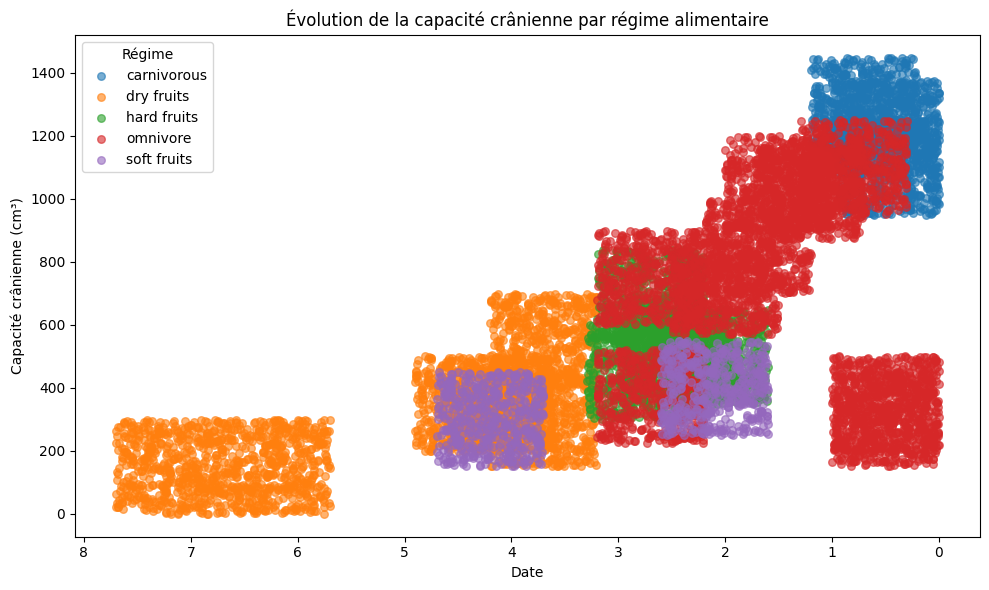

In [89]:

# 2) Tracer un scatter par régime (la couleur est automatique)
plt.figure(figsize=(10,6))
for regime, subset in df.groupby('Diet'):
    plt.scatter(subset['Time_(Ma)'], 
                subset['Cranial_Capacity_(cm³)'], 
                label=regime, 
                alpha=0.6, 
                s=30)
plt.xlabel("Date")
plt.ylabel("Capacité crânienne (cm³)")
plt.gca().invert_xaxis()  # inverser l'axe du temps pour aller du passé vers le présent
plt.title("Évolution de la capacité crânienne par régime alimentaire")
plt.legend(title="Régime")
plt.tight_layout()
plt.show()


Ce graphique présente l’évolution de la capacité crânienne (en cm³) des individus en fonction du temps (axe horizontal inversé, du plus ancien au plus récent) selon leur régime alimentaire. Chaque point est coloré en fonction du type de régime :

Les individus omnivores (rouge) présentent une grande variabilité et atteignent les plus fortes capacités crâniennes (jusqu’à 1400 cm³), notamment au cours du dernier million d’années.

Les carnivores (bleu) se concentrent également sur les périodes récentes et montrent des capacités crâniennes élevées, similaires aux omnivores.

Les régimes à base de fruits secs (orange), fruits mous (violet) et fruits durs (vert) sont davantage associés à des périodes anciennes, avec des capacités crâniennes plus faibles, généralement inférieures à 600 cm³.

Cette représentation suggère que l’adoption de régimes plus diversifiés et riches (comme l’omnivorisme et la consommation de viande) pourrait avoir joué un rôle dans l’augmentation progressive du volume crânien au cours de l’évolution humaine.

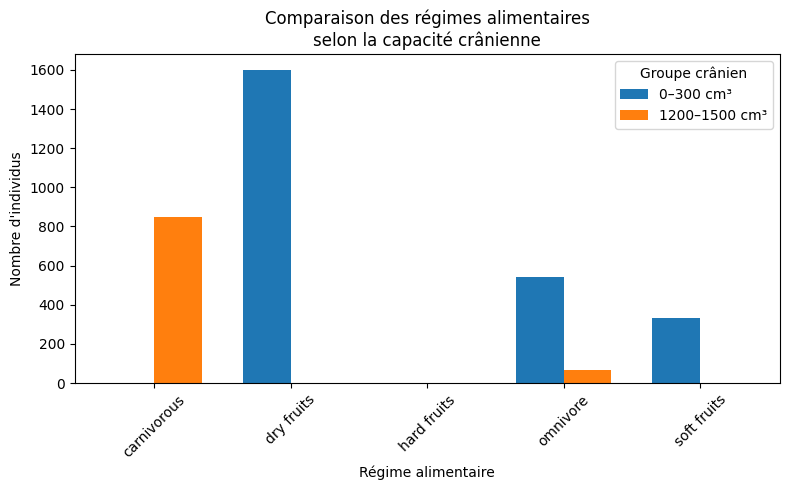

In [90]:
# 1) Créer les masques
c_sup = (df["Cranial_Capacity_(cm³)"] >= 1200) & (df["Cranial_Capacity_(cm³)"] <= 1500)
c_inf = (df["Cranial_Capacity_(cm³)"] >= 0) & (df["Cranial_Capacity_(cm³)"] <= 300)

# 2) Calculer les value_counts pour chaque groupe
counts_sup = df.loc[c_sup, "Diet"].value_counts()
counts_inf = df.loc[c_inf, "Diet"].value_counts()

# 3) Concaténer dans un seul DataFrame (remplir les NaN par 0)
counts = pd.DataFrame({
    '0–300 cm³': counts_inf,
    '1200–1500 cm³': counts_sup
}).fillna(0)

# 4) Préparer le barplot groupé
labels = counts.index
x = np.arange(len(labels))               # positions sur l’axe x
width = 0.35                             # largeur des barres

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, counts['0–300 cm³'], width, label='0–300 cm³')
ax.bar(x + width/2, counts['1200–1500 cm³'], width, label='1200–1500 cm³')

# 5) Finitions
ax.set_xlabel("Régime alimentaire")
ax.set_ylabel("Nombre d'individus")
ax.set_title("Comparaison des régimes alimentaires\nselon la capacité crânienne")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(title="Groupe crânien")
plt.tight_layout()
plt.show()


Ce graphique compare les différents régimes alimentaires en fonction de la capacité crânienne des individus, répartie en deux groupes :

0–300 cm³ (en bleu) : individus à faible capacité crânienne

1200–1500 cm³ (en orange) : individus à forte capacité crânienne

On observe que :

Le régime dry fruits (fruits secs) est fortement représenté chez les individus à faible capacité crânienne, avec près de 1600 individus.

Le régime carnivorous est presque exclusivement associé aux individus à forte capacité crânienne, suggérant un lien entre consommation de viande et développement cérébral.

Le régime omnivore montre une présence dans les deux groupes, mais reste dominé par des individus à capacité réduite.

Les régimes hard fruits et soft fruits sont faiblement représentés, voire absents dans la catégorie des hauts volumes crâniens.

Ce graphique met en évidence une tendance selon laquelle les régimes alimentaires plus énergétiquement denses (comme le carnivorisme) pourraient être associés à une augmentation de la capacité crânienne, soutenant les théories évolutionnistes du rôle de l’alimentation dans le développement cognitif.

In [91]:
df.columns

Index(['Genus_&_Specie', 'Time_(Ma)', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity_(cm³)', 'Height_(cm)', 'Incisor_Size',
       'Jaw_Shape', 'Torus_Supraorbital', 'Prognathism',
       'Foramen_Mágnum_Position', 'Canine Size', 'Canines_Shape',
       'Tooth_Enamel', 'Tecno', 'Tecno_type', 'biped', 'Arms', 'Foots', 'Diet',
       'Sexual_Dimorphism', 'Hip', 'Vertical_Front', 'Anatomy', 'Migrated',
       'Skeleton', 'Cranial_Capacity_normalized', 'Height_normalized',
       'Time_years', 'full_address', 'Latitude', 'Longitude'],
      dtype='object')

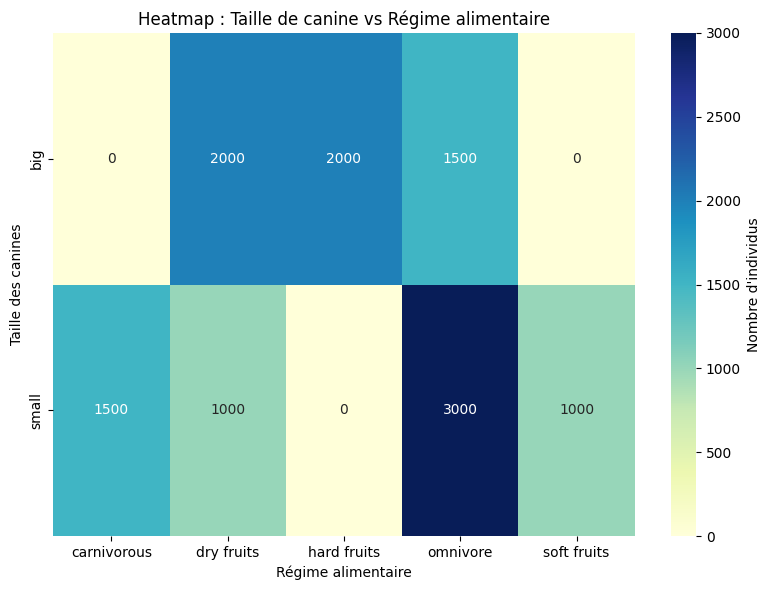

In [92]:
# Calcul du tableau de contingence
ct = pd.crosstab(df["Canine Size"], df["Diet"])

plt.figure(figsize=(8,6))
sns.heatmap(
    ct,
    annot=True,      # affiche les chiffres dans les cases
    fmt="d",         # format entier
    cmap="YlGnBu",
    cbar_kws={"label": "Nombre d'individus"}  # légende de la colorbar
)
plt.title("Heatmap : Taille de canine vs Régime alimentaire")
plt.xlabel("Régime alimentaire")
plt.ylabel("Taille des canines")
plt.tight_layout()
plt.show()

Ce graphique en chaleur (heatmap) présente la répartition du nombre d’individus selon la taille des canines (small ou big) et leur régime alimentaire.

Les individus aux canines petites (small) sont particulièrement nombreux chez les régimes omnivores (3000 individus) et carnivores (1500), tandis qu’ils sont absents dans la catégorie hard fruits.

Les grandes canines (big) sont fréquentes chez les individus ayant un régime dry fruits et hard fruits (2000 individus chacun), ce qui pourrait être lié à des besoins de mastication ou à des fonctions sociales.

On note que les individus à canines big sont absents des régimes carnivores et soft fruits, ce qui peut refléter des évolutions alimentaires spécifiques ou des spécialisations différentes.

Cette carte de chaleur suggère donc une association entre le type de régime alimentaire et la morphologie dentaire, en particulier la taille des canines. Elle pourrait refléter des adaptations évolutives aux contraintes mécaniques ou sociales liées à l’alimentation.

<Axes: xlabel='Tecno_type', ylabel='Count'>

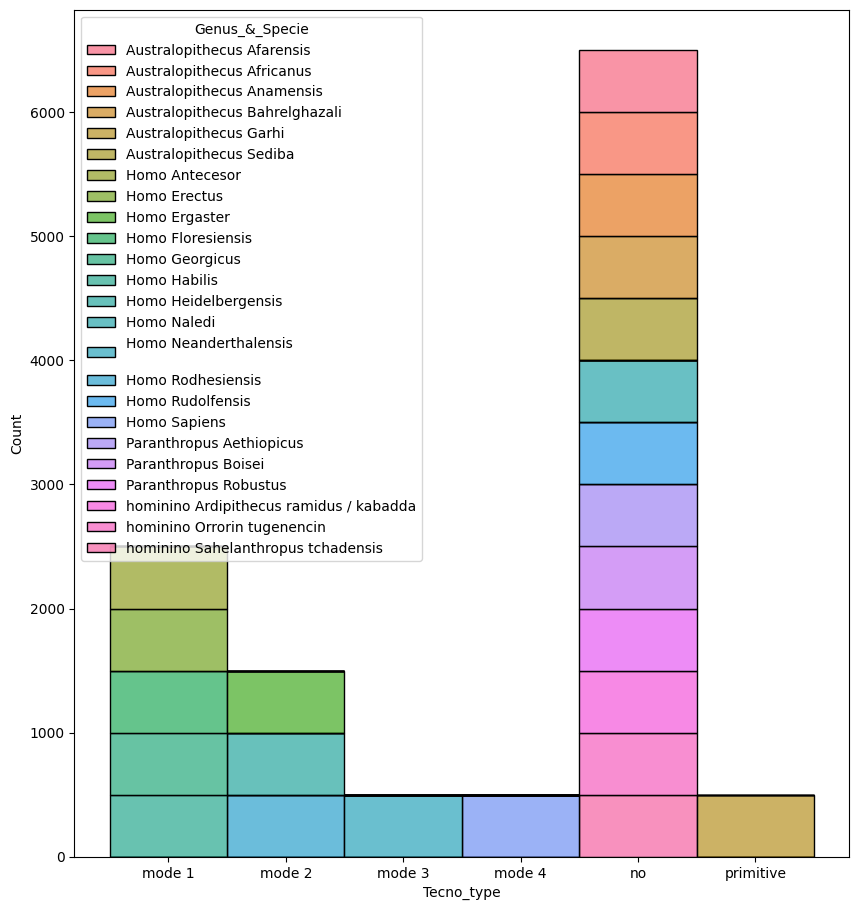

In [93]:
f, ax = plt.subplots(figsize=(10, 11))
sns.histplot(data=df, x="Tecno_type", hue="Genus_&_Specie", multiple="stack")

Ce graphique montre la répartition des types de technologies (Tecno_type) associées aux différentes espèces du dataset. Les barres empilées permettent de visualiser, pour chaque catégorie technologique, les espèces concernées et le nombre d’individus correspondants.

La grande majorité des individus appartient à la catégorie "no", c’est-à-dire sans technologie connue. Cette catégorie est dominée par des espèces anciennes telles que Australopithecus et Paranthropus, ce qui reflète leur absence d’outils ou un niveau technologique très primitif.

Les modes 1 et 2 (correspondant aux premières industries lithiques) sont principalement associés aux espèces du genre Homo, comme Homo habilis et Homo erectus.

Les modes 3 et 4, plus avancés technologiquement, concernent des espèces plus récentes telles que Homo neanderthalensis et Homo sapiens.

La catégorie "primitive" reste marginale et se limite à quelques espèces très anciennes.

Ce graphique met en évidence une progression technologique parallèle à l’évolution des espèces, avec une complexification des outils au fil du temps, en lien avec l’apparition d’espèces du genre Homo et une probable amélioration des capacités cognitives.

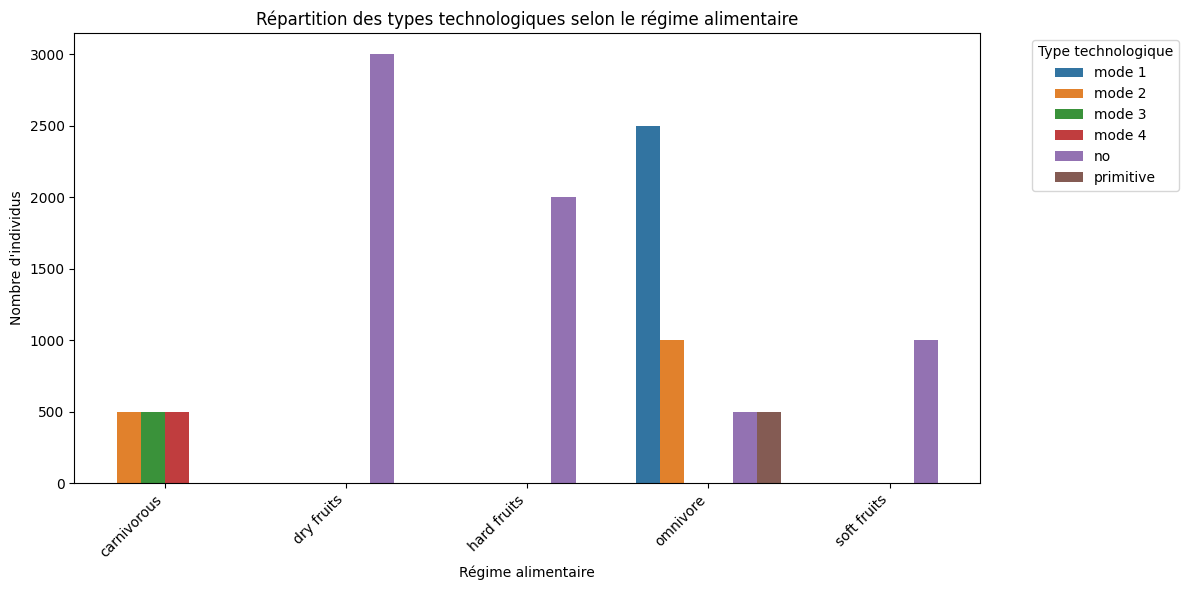

In [94]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x="Diet",
    hue="Tecno_type"
)
plt.title("Répartition des types technologiques selon le régime alimentaire")
plt.xlabel("Régime alimentaire")
plt.ylabel("Nombre d'individus")
plt.legend(title="Type technologique", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Ce graphique illustre la répartition des types technologiques selon les régimes alimentaires des individus présents dans le dataset. Chaque barre représente un type technologique (mode 1 à mode 4, primitive, ou aucun outil), colorée selon la légende à droite.

Les individus ayant un régime dry fruits ou hard fruits sont majoritairement dépourvus de technologies connues, avec près de 3000 et 2000 individus respectivement dans la catégorie "no".

Le régime omnivore se distingue par une plus grande diversité technique, incluant surtout des technologies mode 1 (≈ 2500 individus) et mode 2 (≈ 1000), ainsi qu'une faible part d'outils primitifs. Cela suggère une association entre omnivorisme et développement technologique progressif.

Le régime carnivore est uniquement lié à des outils avancés (modes 2, 3, 4) avec environ 500 individus pour chaque type, indiquant que la consommation de viande pourrait être corrélée à l’usage d’outils spécifiques pour la chasse ou la découpe.

Enfin, les individus à régime soft fruits sont associés à des outils très rudimentaires ou absents, avec 1000 cas sans technologie.

Ce graphique met en lumière une relation probable entre diversification alimentaire et émergence technologique, suggérant que certains régimes comme l’omnivorisme et le carnivorisme ont pu favoriser l’évolution culturelle et cognitive.

In [95]:
df.head(1)

,Genus_&_Specie,Time_(Ma),Location,Zone,Current_Country,Habitat,Cranial_Capacity_(cm³),Height_(cm),Incisor_Size,Jaw_Shape,...,Vertical_Front,Anatomy,Migrated,Skeleton,Cranial_Capacity_normalized,Height_normalized,Time_years,full_address,Latitude,Longitude
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.5141,110.24323,small,conical,...,no,old,no,light,0.099775,0.595969,6041123.75,Kenya,1.441968,38.431398


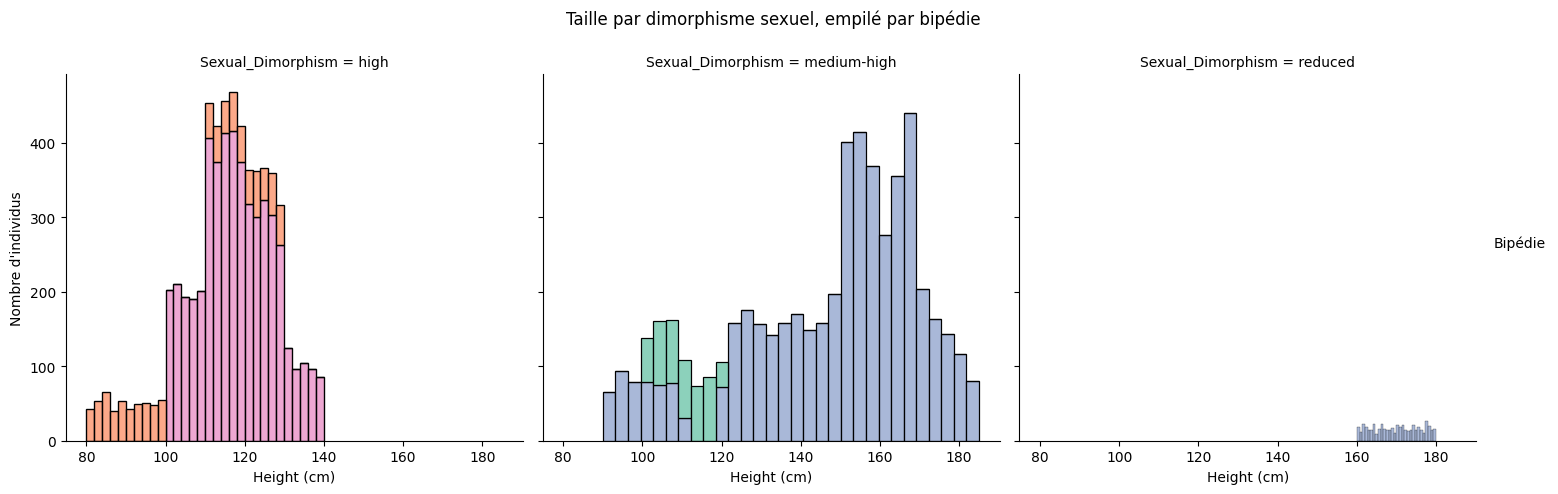

In [96]:
# Taille par Sexual_Dimorphism, empilé par bipédie, en deux volets
g = sns.FacetGrid(
    df,
    col="Sexual_Dimorphism",
    height=5,
    aspect=1
)
g.map_dataframe(
    sns.histplot,
    x="Height_(cm)",
    hue="biped",
    multiple="stack",
    stat="count",
    element="bars",
    palette="Set2",
    bins=30
)
g.set_axis_labels("Height (cm)", "Nombre d'individus")
g.add_legend(title="Bipédie")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Taille par dimorphisme sexuel, empilé par bipédie")
plt.show()

Ce graphique présente la répartition des tailles (Height) selon le niveau de dimorphisme sexuel (Sexual_Dimorphism) et en fonction de la bipédie (empilement des barres). Il est divisé en trois sous-graphes représentant chacun un niveau de dimorphisme : high, medium-high et reduced.

Pour les individus avec un dimorphisme sexuel élevé (high), les tailles sont majoritairement concentrées entre 100 et 130 cm, avec une présence des deux types de bipédie. On remarque une distribution asymétrique, avec un grand nombre d'individus autour de 110–120 cm.

Dans la catégorie medium-high, les tailles sont beaucoup plus dispersées, allant de 100 à 180 cm, avec un pic notable autour de 160 cm. Cette catégorie semble fortement dominée par des individus bipèdes.

Enfin, pour le dimorphisme réduit, on observe une distribution très concentrée entre 160 et 180 cm, exclusivement composée d’individus bipèdes, suggérant une homogénéité morphologique récente.

Ce graphique suggère que la réduction du dimorphisme sexuel s’accompagne d’une augmentation globale de la taille et d’une standardisation vers la bipédie, ce qui est cohérent avec les évolutions observées chez les hominidés modernes.

In [97]:
import plotly.express as px

# 1. Vérifier les colonnes
if 'Current_Country' not in df.columns or 'Cranial_Capacity_(cm³)' not in df.columns:
    raise ValueError("Les colonnes 'Current_Country' ou 'Cranial_Capacity_(cm³)' sont manquantes.")

# 2. Moyenne de la capacité crânienne par pays
mean_cranial = (
    df.groupby('Current_Country')['Cranial_Capacity_(cm³)']
      .mean()
      .reset_index(name='Mean_Cranial_Capacity')
)

# 3. Carte de points
fig_scatter = px.scatter_geo(
    mean_cranial,
    locations='Current_Country',
    locationmode='country names',
    color='Mean_Cranial_Capacity',
    color_continuous_scale='Viridis',
    projection='natural earth',
    title="Capacité crânienne moyenne par pays"
)
fig_scatter.show()

# 4. Densité d'observations par pays
obs_count = (
    df['Current_Country']
      .value_counts()
      .reset_index(name='Observation_Count')
      .rename(columns={'index': 'Current_Country'})
)

fig_density = px.choropleth(
    obs_count,
    locations='Current_Country',
    locationmode='country names',
    color='Observation_Count',
    color_continuous_scale='Reds',
    projection='natural earth',
    title="Densité d'observations par pays"
)
fig_density.show()


/var/folders/dl/grllz11s10j3k3rm1rt8w0nw0000gn/T/ipykernel_13504/759611172.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Ces deux cartes permettent de visualiser la capacité crânienne moyenne ainsi que la densité d’observations par pays à travers le globe.

### Carte 1 : Capacité crânienne moyenne par pays
Cette carte utilise un dégradé de couleurs allant du violet (capacités faibles) au jaune (capacités élevées).
On remarque que :

Les valeurs les plus élevées (proches de 1200 cm³) sont localisées dans certains pays d’Europe ou d’Asie de l'Est.

Des pays comme l’Éthiopie ou le Kenya présentent une capacité moyenne plus modérée à faible, ce qui peut s’expliquer par la forte proportion d’espèces anciennes dans les données.

### Carte 2 : Densité d’observations par pays
Elle met en évidence le nombre d’individus recensés dans chaque pays, avec un dégradé allant du blanc au rouge foncé.

Le Kenya apparaît comme le pays le plus représenté dans le dataset, suivi par l’Éthiopie et l’Afrique du Sud, ce qui reflète leur rôle central dans les découvertes paléoanthropologiques.

Certains pays d’Asie du Sud-Est et d’Océanie apparaissent également, mais avec un nombre plus restreint d’observations.

🔍 Analyse croisée :
Bien que certains pays présentent une forte densité d’observations, cela ne signifie pas nécessairement qu’ils affichent une capacité crânienne moyenne élevée, soulignant l’importance de contextualiser les données en fonction des espèces présentes dans chaque région.